In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics as m
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve


In [4]:
df = pd.read_csv('./bioresponse.csv')
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df['Activity'].values
X = df.drop(['Activity'], axis=1)


In [6]:
def get_metrics(y_test, y_out) -> dict:
    scores = {}
    scores["accuracy"] = m.accuracy_score(y_test, y_out)
    scores["precision"] = m.precision_score(y_test, y_out)
    scores["recall"] = m.recall_score(y_test, y_out)
    scores["f1_score"] = m.f1_score(y_test, y_out)
    scores["log_loss"] = m.log_loss(y_out, y_test)

    return scores


In [7]:
def display_precision_recall(model_name, y_test, y_out_probs):
    fpr, tpr, thr = roc_curve(y_test, y_out_probs[:, 1])
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.suptitle(model_name, fontsize=16)
    # plt.figure(figsize = (9,6))
    ax[0].plot(fpr, tpr)
    ax[0].grid()
    ax[0].set_xlabel("false positive rate",fontsize = 15)
    ax[0].set_ylabel("true positive rate",fontsize = 15)
    ax[0].set_title(u"ROC curve",fontsize = 15)

    pr, r, thr = precision_recall_curve(y_test, y_out_probs[:, 1])
    ax[1].plot(r, pr)
    ax[1].grid()
    ax[1].set_xlabel("recall",fontsize = 15)
    ax[1].set_ylabel("precision",fontsize = 15)
    ax[1].set_title(u"precision-recall curve",fontsize = 15)
    plt.show()

### Prepare data

In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(X,
                                                                    y,
                                                                    test_size=0.3,
                                                                    random_state=1)


### Training models

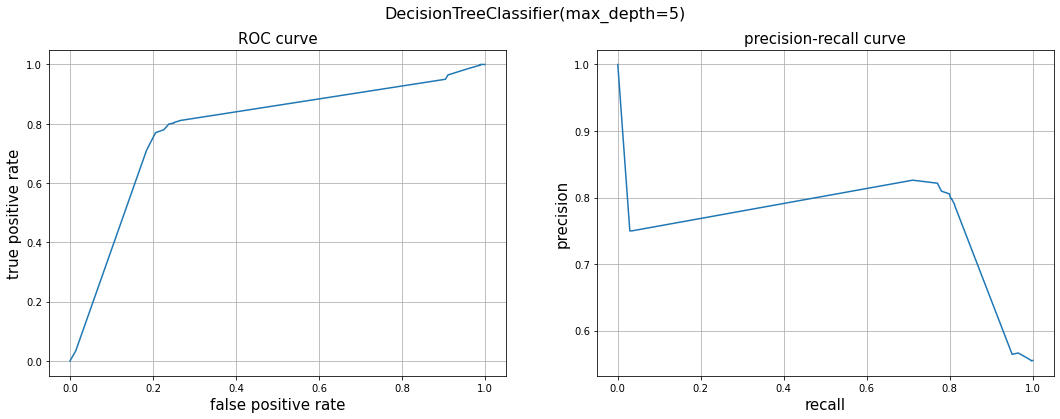

{'accuracy': 0.7797513321492007, 'precision': 0.7987220447284346, 'recall': 0.8038585209003215, 'f1_score': 0.8012820512820513, 'log_loss': 7.607206125066015}


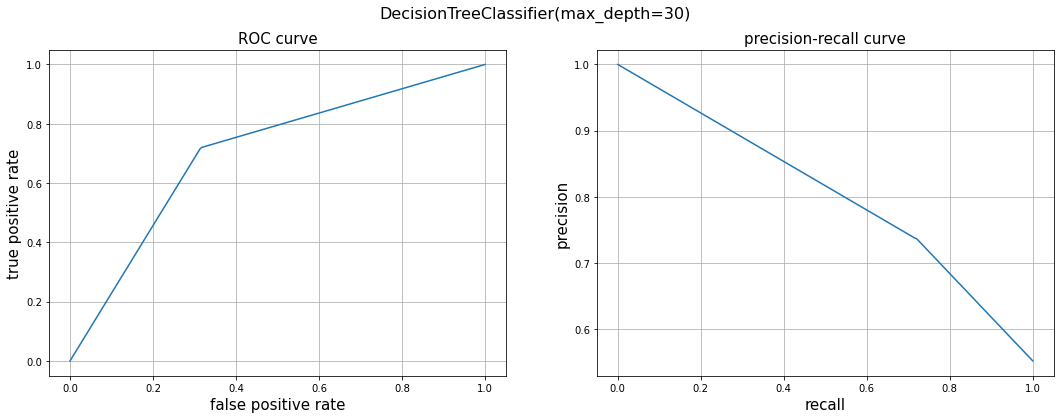

{'accuracy': 0.7033747779751333, 'precision': 0.7368421052631579, 'recall': 0.7202572347266881, 'f1_score': 0.7284552845528455, 'log_loss': 10.245195777844604}


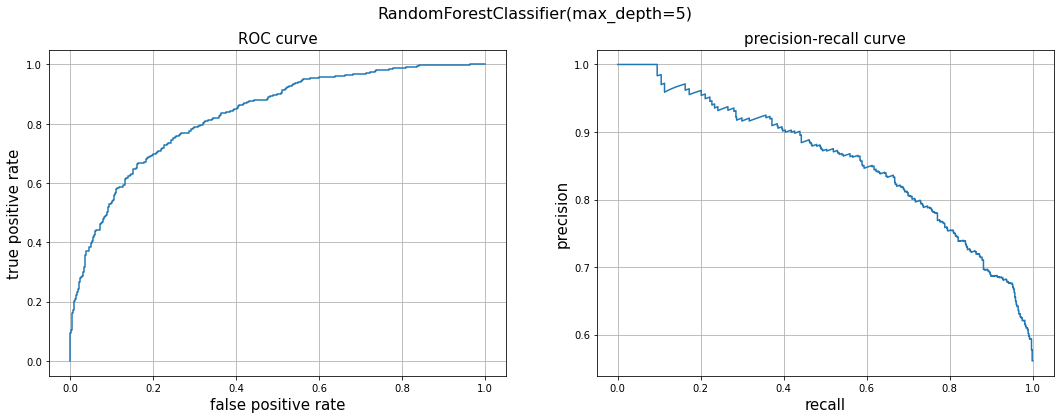

{'accuracy': 0.7468916518650088, 'precision': 0.7678855325914149, 'recall': 0.7765273311897106, 'f1_score': 0.7721822541966427, 'log_loss': 8.742151346884851}


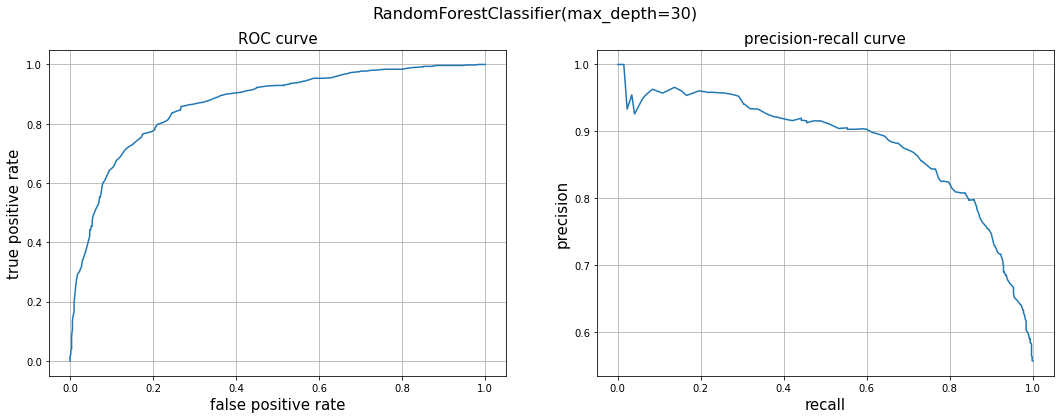

{'accuracy': 0.7939609236234458, 'precision': 0.8239202657807309, 'recall': 0.797427652733119, 'f1_score': 0.8104575163398692, 'log_loss': 7.116427062962241}


In [16]:
models = [DecisionTreeClassifier(max_depth=5),
          DecisionTreeClassifier(max_depth=30),
          RandomForestClassifier(max_depth=5),
          RandomForestClassifier(max_depth=30), ]

for model in models:
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    predictions_probs = model.predict_proba(test_data)
    metrics = get_metrics(test_labels, predictions)
    display_precision_recall(model, test_labels, predictions_probs)
    print(metrics)


### Training models with high recall

In [17]:
models = [DecisionTreeClassifier(max_depth=5, class_weight={0: 1, 1: 150}),
          DecisionTreeClassifier(max_depth=30, class_weight={0: 1, 1: 150}),
          RandomForestClassifier(max_depth=5, class_weight={0: 1, 1: 150}),
          RandomForestClassifier(max_depth=30, class_weight={0: 1, 1: 150}), ]

for model in models:
    print(model)
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    metrics = get_metrics(test_labels, predictions)
    print(metrics)

DecisionTreeClassifier(class_weight={0: 1, 1: 150}, max_depth=5)
{'accuracy': 0.5612788632326821, 'precision': 0.5581818181818182, 'recall': 0.9871382636655949, 'f1_score': 0.7131242740998839, 'log_loss': 15.152896923503835}
DecisionTreeClassifier(class_weight={0: 1, 1: 150}, max_depth=30)
{'accuracy': 0.6234458259325044, 'precision': 0.6, 'recall': 0.954983922829582, 'f1_score': 0.7369727047146402, 'log_loss': 13.005740302104952}
RandomForestClassifier(class_weight={0: 1, 1: 150}, max_depth=5)
{'accuracy': 0.5550621669626998, 'precision': 0.553873552983081, 'recall': 1.0, 'f1_score': 0.712893982808023, 'log_loss': 15.367608324911417}
RandomForestClassifier(class_weight={0: 1, 1: 150}, max_depth=30)
{'accuracy': 0.5790408525754884, 'precision': 0.5686456400742115, 'recall': 0.9855305466237942, 'f1_score': 0.7211764705882353, 'log_loss': 14.539420255385911}
